<a href="https://colab.research.google.com/github/mittushaji25/crypto-xrp-analysis/blob/main/notebooks/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **🚀 XRPUSDT Crypto Market Data - Exploratory Data Analysis**


**A Comprehensive Exploratory Data Analysis of XRP Price, Volume, Volatility, and Trade Behavior**

- This notebook presents a detailed exploration of XRPUSDT market data from 2023 to 2025.

- It includes visual insights into price trends, volatility, trading volume, and buyer behavior — laying the foundation for forecasting and dashboard development.

## Load Cleaned Dataset   





In [ ]:
import pandas as pd
xrp_data = pd.read_csv("/content/crypto-xrp-analysis/data/cleaned/xrpusdt_data_cleaned.csv")

## Basic Overview

In [ ]:
# Data types and missing values
xrp_data.info()

# Summary statistics
xrp_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               912 non-null    object 
 1   open                    912 non-null    float64
 2   high                    912 non-null    float64
 3   low                     912 non-null    float64
 4   close                   912 non-null    float64
 5   volume                  912 non-null    float64
 6   close_time              912 non-null    object 
 7   quote_asset_volume      912 non-null    float64
 8   number_of_trades        912 non-null    int64  
 9   taker_buy_base_volume   912 non-null    float64
 10  taker_buy_quote_volume  912 non-null    float64
 11  source_filename         912 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 85.6+ KB


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
count,912.000000,912.000000,912.000000,912.000000,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02
mean,0.970641,1.003148,0.936285,0.972723,3.700959e+08,3.492578e+08,7.728642e+05,1.833062e+08,1.726876e+08
std,0.792662,0.824639,0.757598,0.793491,2.941272e+08,5.077632e+08,1.211049e+06,1.468311e+08,2.526205e+08
min,0.338000,0.340000,0.300000,0.338000,4.052670e+07,2.750721e+07,3.836700e+04,1.998583e+07,1.261434e+07
25%,0.502775,0.511175,0.488975,0.502950,1.887051e+08,1.304329e+08,1.558885e+05,9.157859e+07,6.367682e+07
50%,0.561300,0.576600,0.543200,0.562050,3.031664e+08,1.949285e+08,2.870230e+05,1.521314e+08,9.759324e+07
75%,0.816275,0.930425,0.770550,0.837975,4.425727e+08,3.478961e+08,8.052872e+05,2.201800e+08,1.704561e+08
max,3.292300,3.400000,3.175800,3.292200,2.543717e+09,6.398461e+09,1.149188e+07,1.284592e+09,3.232098e+09


In [ ]:
# Check for duplicates
print("Duplicates:", xrp_data.duplicated().sum())

# Check for nulls
print("Missing values:\n", xrp_data.isnull().sum())

Duplicates: 0
Missing values:
 open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
source_filename           0
dtype: int64


## 📈 Price Over Time

This chart shows how the closing price of XRP has evolved over time.   It helps identify long-term trends, price spikes, and periods of consolidation.

In [ ]:
xrp_data.set_index("open_time", inplace=True)

# Convert index to datetime
xrp_data.index = pd.to_datetime(xrp_data.index)

In [ ]:
xrp_data['year'] = xrp_data.index.year

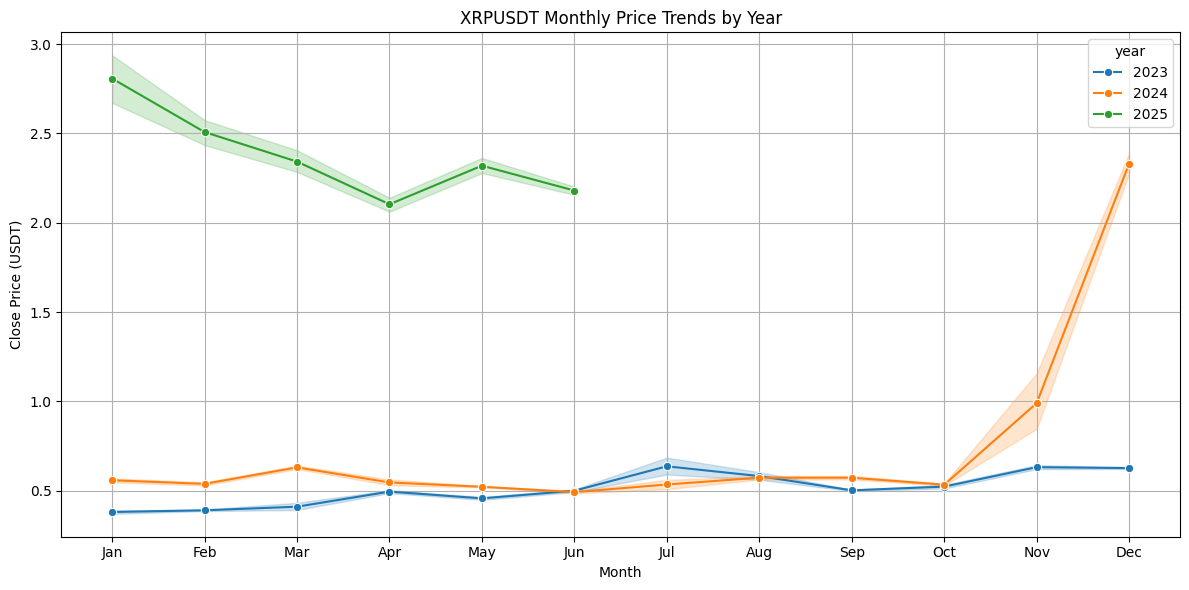

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to keep datetime as a column
df_reset = xrp_data.reset_index()

# Extract year and month for plotting
df_reset['year'] = df_reset['open_time'].dt.year
df_reset['month'] = df_reset['open_time'].dt.month
df_reset['month_name'] = df_reset['open_time'].dt.strftime('%b')  # Jan, Feb, etc.

# Create a combined key for x-axis (month only)
df_reset['month_name'] = pd.Categorical(df_reset['month_name'],
                                        categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                        ordered=True)

# Plot: XRP Close Price by Month for Each Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reset, x='month_name', y='close', hue='year', marker='o', palette='tab10')

plt.title('XRPUSDT Monthly Price Trends by Year')
plt.xlabel('Month')
plt.ylabel('Close Price (USDT)')
plt.grid(True)
plt.tight_layout()
plt.show()

- **2023:** XRP maintained a relatively stable price around 0.5 USDT, showing minimal volatility.
- **2024:**The price remained flat for most of the year, but peaked in December, reaching nearly 3.0 USDT - possibly due to market catalysts or investor speculation.
- **2025:** XRP started strong at around 3.0 USDT in January, but gradually declined throughout the year, ending near 2.0 USDT.

This visualization reveals a sharp breakout at the end of 2024 followed by a cooling-off period in 2025. Such patterns may indicate speculative cycles or macroeconomic influences, and are valuable for forecasting and strategic positioning.

## 📊 Trading Volume and Volatility Over Time

Volume reflects market activity, while volatility measures price fluctuation. Tracking both helps us understand when the market is active and unstable.

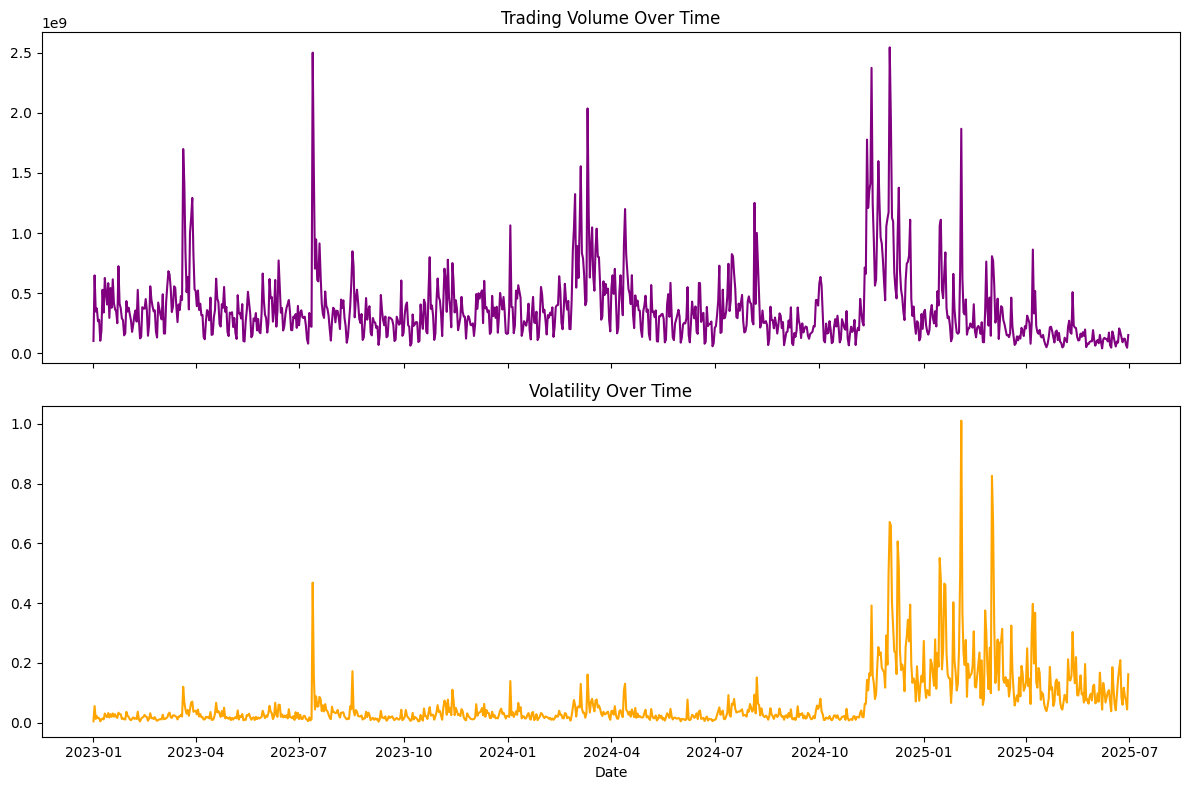

In [ ]:

xrp_data['volatility'] = xrp_data['high'] - xrp_data['low']

# Plot volume and volatility
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(xrp_data['volume'], color='purple')
ax[0].set_title('Trading Volume Over Time')

ax[1].plot(xrp_data['volatility'], color='orange')
ax[1].set_title('Volatility Over Time')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


The charts reveal key market dynamics across the XRPUSDT timeline:

- **Mid-2023:** Both trading volume and volatility spiked, suggesting a period of intense market activity - possibly driven by news or speculation.
- **Early 2025:** Another surge in volume and volatility occurred, aligning with the price breakout seen in the previous chart. This indicates strong investor engagement and rapid price fluctuations.
- **2024:** A relatively calm period with lower volume and volatility, reflecting market consolidation or reduced interest.

The correlation between volume and volatility is evident — when one spikes, the other often follows. These patterns are crucial for identifying high-risk periods and potential breakout zones in crypto markets.

## 🔄 Daily % Change in Close Price

This plot shows the day-to-day percentage change in XRP's closing price. It highlights short-term price movements and market momentum.

In [ ]:
xrp_data['% change'] = xrp_data['close'].pct_change()

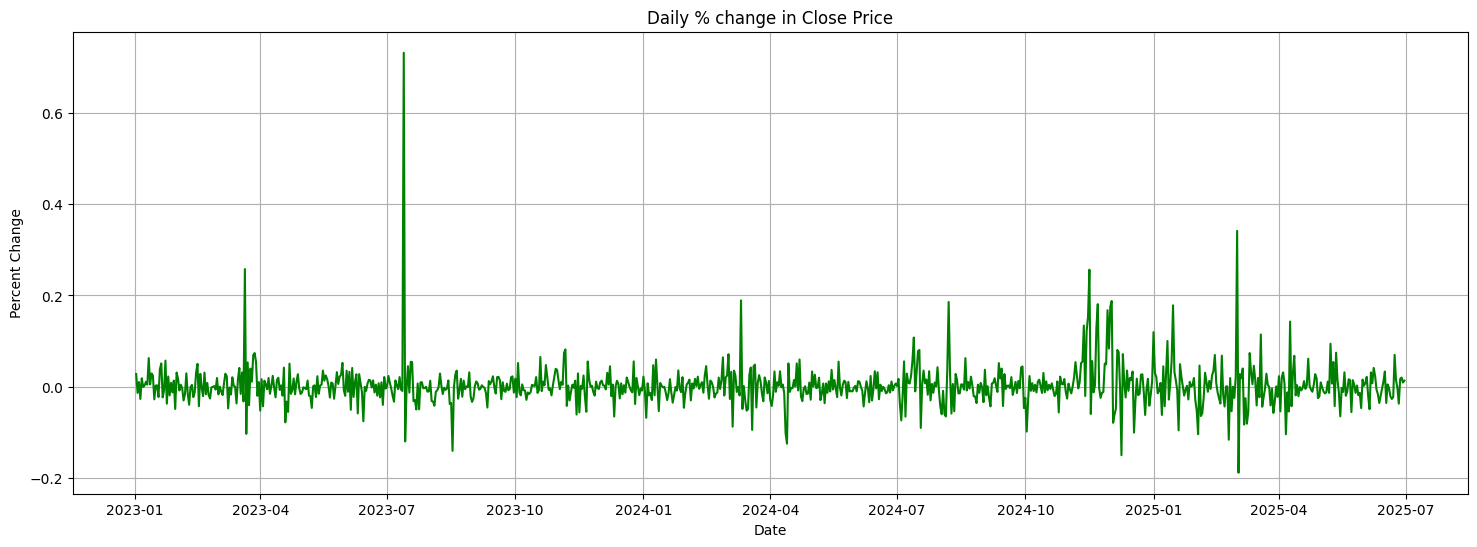

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(xrp_data['% change'], color='green')
plt.title('Daily % change in Close Price')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.grid(True)
plt.show()

This chart highlights the short-term volatility in XRP's closing price from January 2023 to June 2025:

- The percentage change fluctuates around 0, indicating that most daily movements are modest.
- Spikes above 0.4 and dips below -0.2 suggest days of significant price action — likely driven by market news, whale trades, or technical breakouts.
- The most volatile periods appear in late 2024 and early 2025, aligning with the price surge seen in previous charts.

This visualization is crucial for identifying high-risk trading days and understanding the rhythm of XRP's price movements. It also sets the stage for volatility modeling and forecasting.


## 📊 Distribution of Daily % Change and Volatility

Histograms reveal how frequently certain values occur. This helps us understand the typical behavior and extremes in XRP's price and volatility.


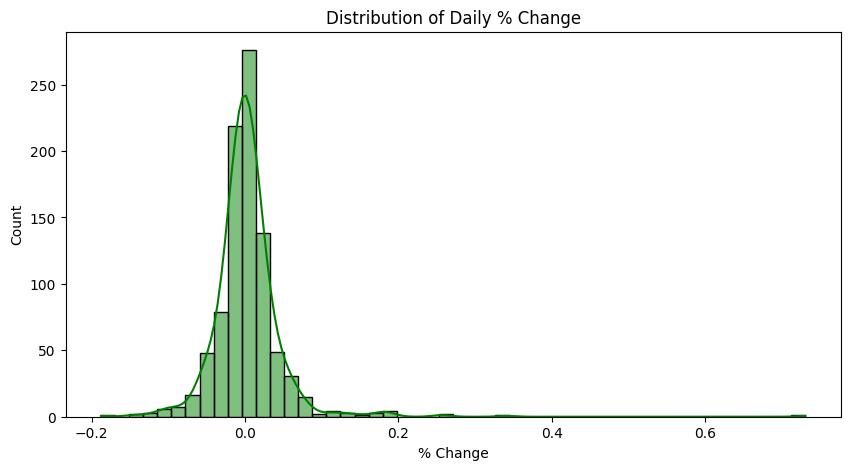

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(xrp_data['% change'].dropna(), bins=50, kde=True, color='green')
plt.title("Distribution of Daily % Change")
plt.xlabel("% Change")
plt.show()

The histogram reveals the nature of XRP's daily price movements:

- Most daily percentage changes cluster around 0%, indicating that XRP typically experiences small day-to-day fluctuations.
- The distribution is slightly right-skewed, suggesting that positive price changes are more frequent than negative ones.
- A few outliers exist beyond +0.4%, representing days of strong upward momentum

This distribution helps quantify XRP's volatility and supports the use of models that account for asymmetric risk — especially in forecasting and trading strategies.

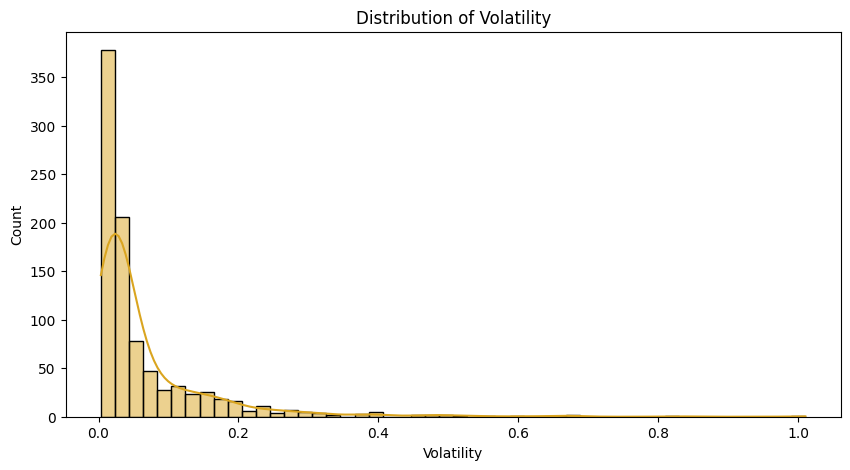

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(xrp_data['volatility'], bins=50, kde=True, color='goldenrod')
plt.title('Distribution of Volatility')
plt.xlabel('Volatility')
plt.show()

This histogram illustrates how volatility — defined as the difference between daily high and low prices — is distributed across the dataset:

- The distribution is right-skewed, meaning most trading days have low volatility, while a few days exhibit extreme price swings.
- The density curve confirms that the majority of values fall within a narrow range, with a long tail extending toward higher volatility.
- These high-volatility outliers may correspond to major market events, news releases, or speculative trading surges.

## 🔗 Correlation Matrix of Numeric Features

This heatmap shows how different metrics relate to each other.

In [ ]:
numeric_cols = xrp_data.select_dtypes(include='number')
corr = numeric_cols.corr()

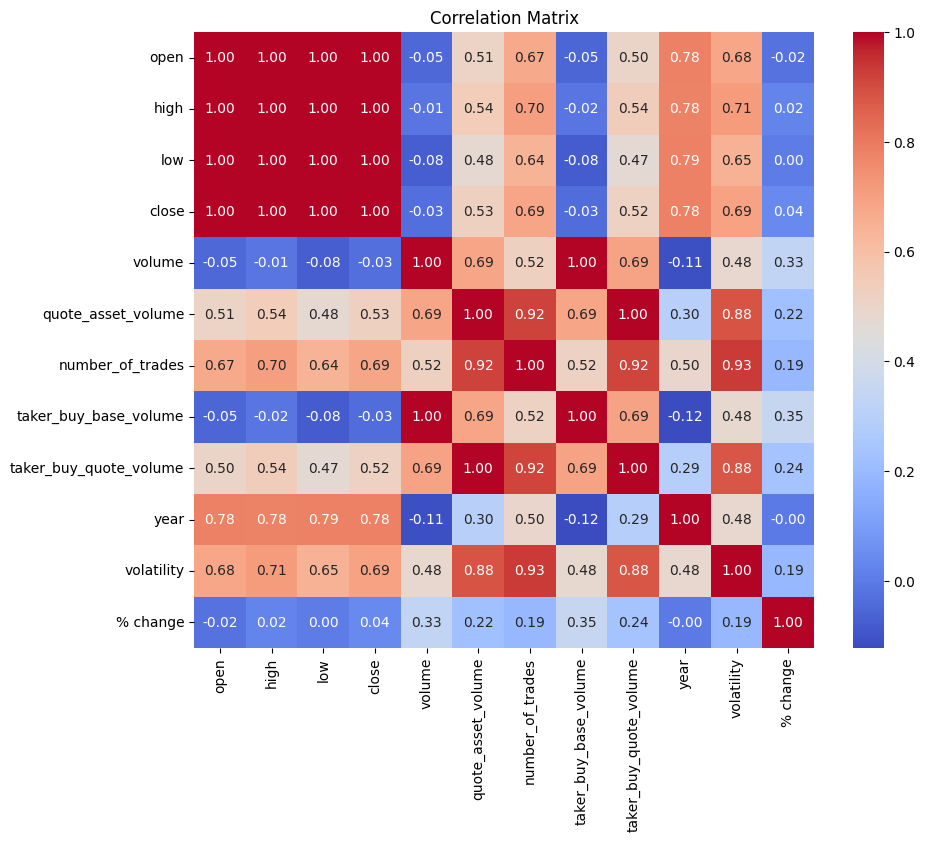

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This heatmap reveals how various financial metrics in the XRP dataset relate to one another:

- **High correlations**:
  - `quote_asset_volume` and `volume` show a near-perfect positive correlation — expected, since quote volume is derived from base volume.
  - `taker_buy_quote_volume` and `taker_buy_base_volume` also correlate strongly, reflecting consistent buyer behavior.
  - `high`, `low`, `open`, and `close` prices are tightly linked, indicating stable candle structures.

- **Moderate correlations**:
  - `volatility` and `% change` show a positive relationship, suggesting that larger price swings often accompany directional moves.
  - `number_of_trades` has a moderate correlation with volume, implying that trade count alone doesn't fully explain market activity.

- **Weak or negligible correlations**:
  - `year` has low correlation with most metrics, which is expected since it's categorical and not inherently predictive.

This matrix helps identify which features are redundant, which are informative, and which could be useful for predictive modeling or feature selection.


## 📉 Average Trade Size Over Time

This metric shows how much XRP is traded per transaction. It helps distinguish between retail and institutional activity.


In [ ]:
xrp_data['avg_trade_size'] = xrp_data['volume'] / xrp_data['number_of_trades']

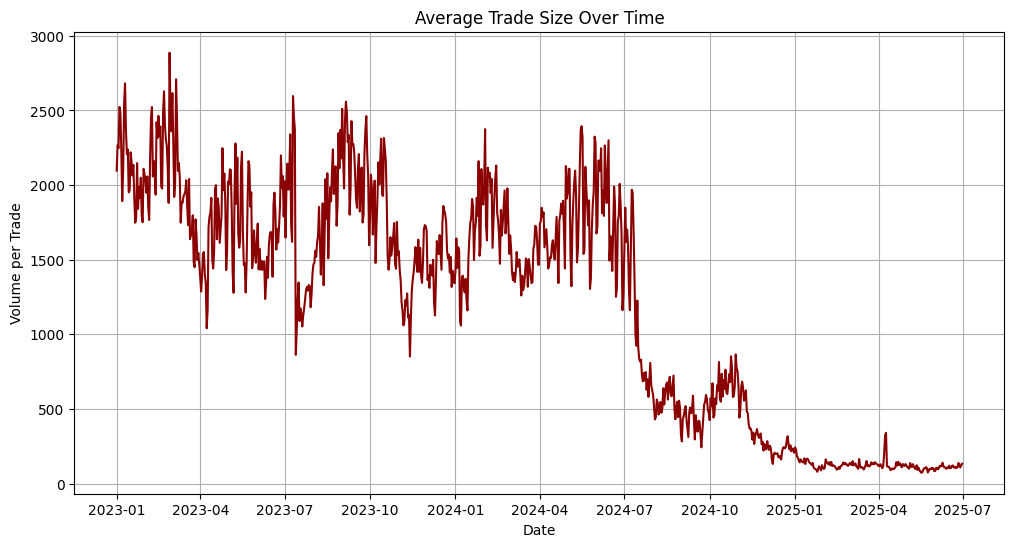

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xrp_data['avg_trade_size'], color='darkred')
plt.title('Average Trade Size Over Time')
plt.xlabel('Date')
plt.ylabel('Volume per Trade')
plt.grid(True)
plt.show()

This chart tracks how the average volume per trade has evolved from January 2023 to July 2025:

- **Early 2023**: Trade sizes were relatively large, averaging around 2500 units — possibly indicating institutional activity or low trade frequency.
- **Mid-2024**: A sharp decline in average trade size occurred, stabilizing around 500 units. This shift may reflect increased retail participation or algorithmic trading with smaller order sizes.
- **2025**: The average trade size remained consistently low, with minor fluctuations, suggesting a more fragmented and possibly more liquid market.

## 🛒 Taker Buy Volume vs. Total Volume

Taker buy volume reflects aggressive buying behavior. Comparing it to total volume helps assess market sentiment.


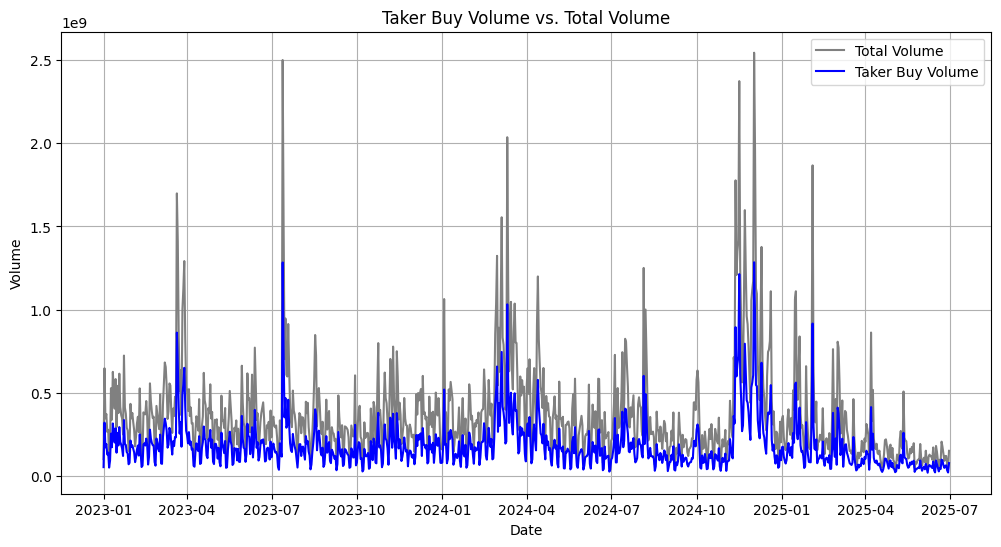

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xrp_data['volume'], label='Total Volume', color='gray')
plt.plot(xrp_data['taker_buy_base_volume'], label='Taker Buy Volume', color='blue')
plt.title('Taker Buy Volume vs. Total Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

This chart compares the total trading volume with the volume initiated by taker buy orders (buying behavior):

- **Trend Alignment**: Both lines follow similar patterns, indicating that taker buy volume moves in aligns with overall market activity.
- **Volume Gap**: Total volume consistently exceeds taker buy volume, which is expected since it includes both buy and sell orders.
- **Spikes**: Notable peaks in both metrics occur in early 2023, late 2024, and early 2025, possibly dirven by sentiment or major events.

This comparison helps assess market dynamics and trader behavior. This is useful for sentiment analysis and future strategy development.


### 🧠 Key Takeaways from EDA
- XRP's market behavior changed significantly from 2023 to 2025, with increased volatility and volume in later stages.
- Feature engineering opportunities include volatility, % change, average trade size, and taker buy ratios.
- These insights lay a strong foundation for forecasting, anomaly detection, and dashboard design.